## Предварительная загрузка и фильтрация данных

In [7]:
import pandas as pd

# Определим размер чанка для обработки данных
chunk_size = 1000000

# Создадим пустой DataFrame, в который будем добавлять данные из чанков
page_df = pd.DataFrame()

# Читаем файл по чанкам и добавляем данные в DataFrame
for chunk in pd.read_csv("Downloads\page.tsv", sep="\t", chunksize=chunk_size):
    chunk = chunk[chunk['len'] > 200]
    chunk = chunk[chunk['views'] > 100000]
    page_df = pd.concat([page_df, chunk], ignore_index=True)

page_df

In [ ]:
cat = pd.read_csv("Downloads\category.tsv", sep="\t")
cat = cat.sort_values(by = 'pages', ascending = False)
cat = cat[cat['pages'] > 100000]
cat

,category_id,title,pages,subcats,files
1593937,247193040,Articles_with_short_description,3440192,6,0
452029,796685,Noindexed_pages,2871631,49108,681596
1995739,248105012,Short_description_is_different_from_Wikidata,2457666,0,0
1062093,208380183,All_stub_articles,2313349,0,0
259705,344917,WikiProject_Biography_articles,1836311,9,0
...,...,...,...,...,...
146711,190455,Low-importance_Lepidoptera_articles,101290,0,0
227639,298702,WikiProject_Poland_articles,101038,5,0
532457,30959529,Articles_containing_Japanese-language_text,100682,0,0
451487,795306,Wikipedia_soft_redirected_categories,100666,100666,0


In [ ]:
page_cat = pd.read_csv("Downloads/page_category.tsv", sep="\t")

filtered_page_cat = page_cat[page_cat['category_id'].isin(cat['category_id']) & page_cat['page_id'].isin(page_df['page_id'])]

filtered_page_cat

,page_id,category_id,type
1342895,61447870,2865710,page
3166862,55049264,2,page
3329074,12,247193040,page
3329075,25,247193040,page
3329077,290,247193040,page
...,...,...,...
125396839,37716939,248440938,page
125425907,43820515,248440938,page
125468053,53505711,248440938,page
125506626,63889973,248440938,page


In [ ]:
from tqdm import tqdm

unique_categories = set(filtered_page_cat['category_id'].unique())

for category in tqdm(unique_categories):
    # Название столбца соответствует category_id
    # Значение - 1, если для данного page_id есть запись в filtered_page_cat с таким category_id, иначе - 0
    page_df[category] = page_df['page_id'].apply(lambda x: 1 if any(filtered_page_cat.loc[filtered_page_cat['page_id'] == x, 'category_id'] == category) else 0)

page_df

100%|██████████| 67/67 [07:41<00:00,  6.89s/it]


,page_id,namespace,title,is_redirect,is_new,touched,links_updated,latest,len,content_model,...,246660437,169959383,247074393,247511900,247771235,217438692,217357158,248440938,247742702,754
0,12,0,Anarchism,0,0,20210701093040,2.021070e+13,1030472204,96584,wikitext,...,0,1,0,0,0,0,0,0,0,0
1,25,0,Autism,0,0,20210628002828,2.021063e+13,1030778215,133536,wikitext,...,0,1,0,0,0,1,0,0,0,0
2,290,0,A,0,0,20210629155037,2.021063e+13,1031061699,28174,wikitext,...,0,0,0,0,0,0,0,0,0,0
3,303,0,Alabama,0,0,20210630195529,2.021063e+13,1030569729,197906,wikitext,...,0,1,1,0,1,0,0,0,0,1
4,305,0,Achilles,0,0,20210629135700,2.021063e+13,1026893838,77042,wikitext,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31246,67982439,0,UFC_Fight_Night_191,0,0,20210701025719,2.021063e+13,1031269620,3565,wikitext,...,0,0,0,0,0,0,0,0,0,0
31247,68031119,0,Marieval_Indian_Residential_School,0,0,20210630193629,2.021063e+13,1031168230,20813,wikitext,...,0,0,0,0,0,0,0,0,0,0
31248,68035614,0,Surfside_condominium_building_collapse,0,0,20210701055924,2.021070e+13,1031361753,81301,wikitext,...,0,0,0,0,0,0,0,0,0,0
31249,68043791,0,Gina_Coladangelo,0,0,20210629220219,2.021063e+13,1031113602,11494,wikitext,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
page_df_features = page_df.drop(['title','touched','links_updated','latest','content_model', 'creation'], axis = 1)

In [ ]:
page_df_features = page_df_features.fillna(0)
page_df_features_x = page_df_features.drop('page_id', axis = 1)
page_df_features_x

,namespace,is_redirect,is_new,len,page_edits,editors,views,references,192768769,2,...,246660437,169959383,247074393,247511900,247771235,217438692,217357158,248440938,247742702,754
0,0,0,0,96584,19819.0,3773.0,237226.0,92.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,133536,10563.0,3731.0,469365.0,226.0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,28174,4778.0,2597.0,449105.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,197906,9997.0,4381.0,324587.0,207.0,0,0,...,0,1,1,0,1,0,0,0,0,1
4,0,0,0,77042,7189.0,3508.0,383435.0,27.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31246,0,0,0,3565,3.0,2.0,114793.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
31247,0,0,0,20813,165.0,63.0,122330.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
31248,0,0,0,81301,1299.0,287.0,538730.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
31249,0,0,0,11494,117.0,33.0,122577.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

unique_page_ids = page_df['page_id'].unique()

# Определим размер чанка для обработки данных
chunk_size = 1000000

page_link_df = pd.DataFrame()

# Читаем файл по чанкам и добавляем только нужные данные в DataFrame
for chunk in pd.read_csv("Downloads/page_link.tsv", sep="\t", chunksize=chunk_size):
    chunk = chunk[chunk['page_id'].isin(unique_page_ids)]
    chunk = chunk[chunk['linked_page_id'].isin(unique_page_ids)]
    page_link_df = pd.concat([page_link_df, chunk], ignore_index=True)



In [ ]:
page_link_df.shape

(2432367, 2)

In [ ]:
page_link_df = page_link_df.sample(frac = 0.25, random_state=42)

In [ ]:
import pickle

# Сохранение датасета в файл
with open('Desktop/page_df.pkl', 'wb') as file:
    pickle.dump(page_df, file)

# Сохранение датасета в файл
with open('Desktop/page_link_df.pkl', 'wb') as file:
    pickle.dump(page_link_df, file)

## Создание графа

In [2]:
import pickle


# Загрузка датасета из файла
with open('page_df.pkl', 'rb') as file:
    page_df = pickle.load(file)

# Загрузка датасета из файла
with open('page_link_df.pkl', 'rb') as file:
    page_link_df = pickle.load(file)

In [3]:
page_df = page_df.iloc[:round(len(page_df)/2)]

In [4]:
page_link_df = page_link_df[page_link_df.page_id.isin(page_df.page_id.values)]
page_link_df = page_link_df[page_link_df.linked_page_id.isin(page_df.page_id.values)]

In [5]:
import networkx as nx

# Create a directed graph
merged_graph = nx.DiGraph()

# Add nodes from the page file
for index, row in page_df.iterrows():
    merged_graph.add_node(row['page_id'], attr_dict=row.to_dict())

In [6]:
# Add edges from the page_link file
for index, row in page_link_df.iterrows():
    merged_graph.add_edge(row['page_id'], row['linked_page_id'])

In [7]:
page_df_features = page_df.drop(['title','touched','links_updated','latest','content_model', 'creation'], axis = 1)
page_df_features = page_df_features.fillna(0)

In [8]:
features_dict = page_df_features.set_index(page_df_features.columns[0]).T.to_dict('list')

In [9]:
import numpy as np

num_nodes = merged_graph.number_of_nodes()
num_edges = merged_graph.number_of_edges()
density = nx.density(merged_graph)
degrees = [degree for node, degree in nx.degree(merged_graph)]
avg_degree = np.mean(degrees)

print(f"Количество узлов: {num_nodes}")
print(f"Количество рёбер: {num_edges}")
print(f"Плотность графа: {density}")
print(f"Средняя степень узлов: {avg_degree}")

Количество узлов: 15626
Количество рёбер: 266761
Плотность графа: 0.0010925831306796364
Средняя степень узлов: 34.14322283373864


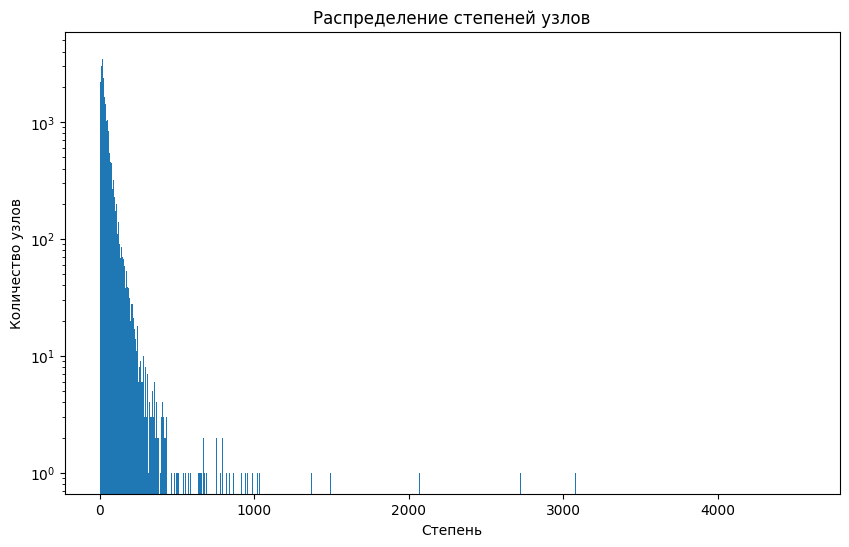

In [7]:
import matplotlib.pyplot as plt

degrees = [degree for node, degree in nx.degree(merged_graph)]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=1000)
plt.title("Распределение степеней узлов")
plt.xlabel("Степень")
plt.ylabel("Количество узлов")
plt.yscale('log', nonpositive='clip')
plt.show()


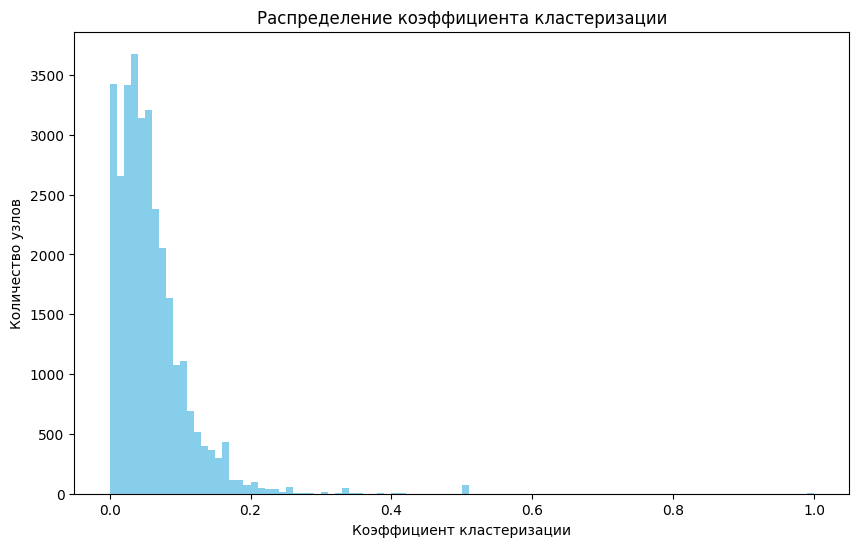

In [8]:
clustering_coeffs = list(nx.clustering(merged_graph).values())
plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs, bins=100, color='skyblue')
plt.title("Распределение коэффициента кластеризации")
plt.xlabel("Коэффициент кластеризации")
plt.ylabel("Количество узлов")
plt.show()


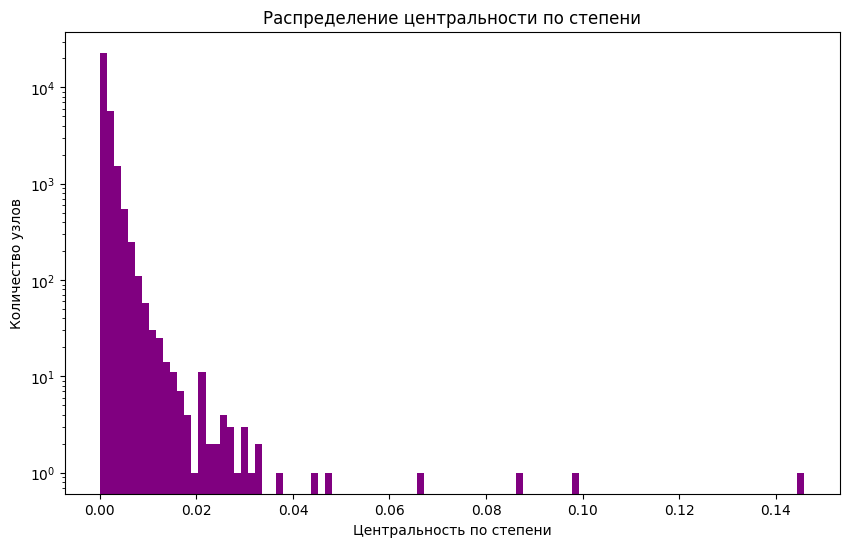

In [9]:
degree_centrality = nx.degree_centrality(merged_graph)
values = list(degree_centrality.values())

plt.figure(figsize=(10, 6))
plt.hist(values, bins=100, color='purple')
plt.title("Распределение центральности по степени")
plt.xlabel("Центральность по степени")
plt.ylabel("Количество узлов")
plt.yscale('log', nonpositive='clip')
plt.show()

In [10]:
# Визуализация наибольшей компоненты связности
largest_cc = max(nx.connected_components(merged_graph), key=len)
subgraph = merged_graph.subgraph(largest_cc)

pos = nx.spring_layout(subgraph)  # Может быть ресурсоёмким для больших подграфов
plt.figure(figsize=(12, 12))
nx.draw(subgraph, pos, with_labels=False, node_size=20)
plt.title("Наибольшая компонента связности")
plt.show()


In [11]:
# !pip install torch-scatter -f https://data.pyg.org/whl/torch-1.9.0+cu111.html
# !pip install torch-sparse -f https://data.pyg.org/whl/torch-1.9.0+cu111.html
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


## Тестовая моделька

In [12]:
from torch_geometric.nn import GCNConv
from torch.nn import ReLU, PReLU

In [19]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GraphConv
import networkx as nx
from sklearn.model_selection import train_test_split
from torch_geometric.utils import from_networkx, negative_sampling
from torch_geometric.utils import train_test_split_edges
from sklearn.metrics import roc_auc_score

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [44]:
# data = from_networkx(merged_graph)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# data = data.to(device)

In [15]:
# import torch
# from torch_geometric.data import Data
# from torch_geometric.nn import GCNConv
# from torch_geometric.nn import GraphConv
# import networkx as nx
# from sklearn.model_selection import train_test_split
# from torch_geometric.utils import from_networkx, negative_sampling
# from torch_geometric.utils import train_test_split_edges
# from torch.utils.tensorboard import SummaryWriter

# Преобразование NetworkX графа в PyTorch Geometric Data
data = from_networkx(merged_graph)

num_nodes = len(features_dict)  # Получаем количество узлов
num_features = len(next(iter(features_dict.values()))) if isinstance(features_dict, dict) else len(features_dict[0])

# Инициализируем тензор для хранения фичей всех узлов
features_tensor = torch.zeros((num_nodes, num_features), dtype=torch.float)

# Заполняем тензор фичами из вашего словаря или списка
for node_id, features in enumerate(features_dict.values() if isinstance(features_dict, dict) else features_dict):
    features_tensor[node_id] = torch.tensor(features, dtype=torch.float)

# Присваиваем собранные фичи узлов в data.x
data.x = features_tensor

# Разделение рёбер на обучающую и тестовую выборки
data = train_test_split_edges(data)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


# GCN

Epoch: 200, Loss Train: 101139.9219, Acc Train: 0.684064, ROC AUC Train: 0.789140
Epoch: 200, Loss Val: 118198.1172, Acc Val: 0.648303, ROC AUC Test: 0.733421


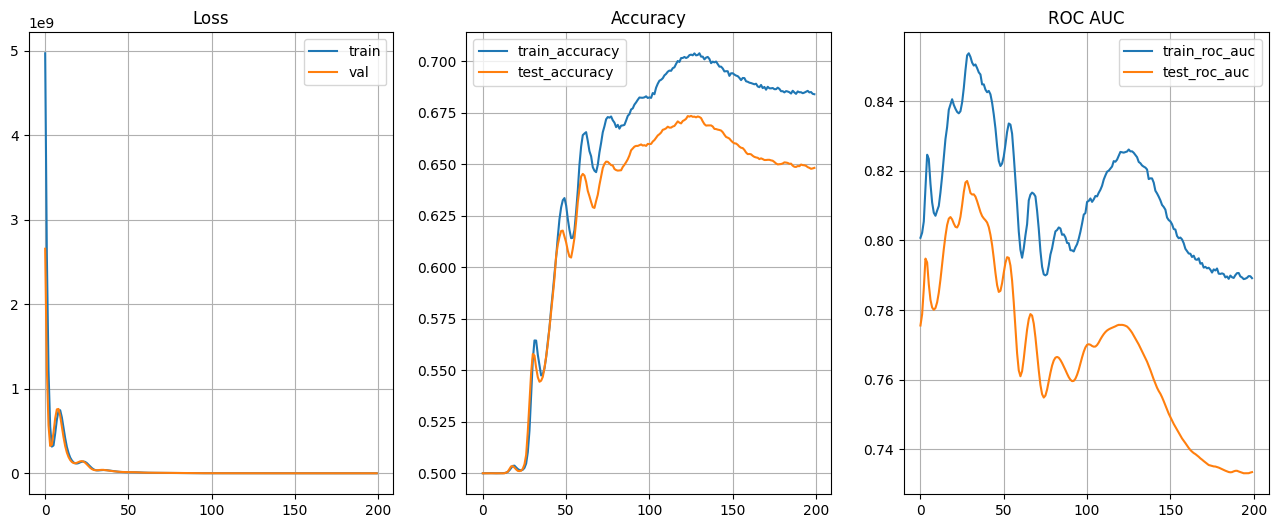

In [31]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(data.num_node_features, 512)
        self.prelu = PReLU(512)
        self.conv2 = GCNConv(512, 64)

    def encode(self):
        x = self.conv1(data.x, data.train_pos_edge_index)
        x = self.prelu(x)
        return self.conv2(x, data.train_pos_edge_index)

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        return logits

model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()

def train():
    # loss_log, acc_log = [], []
    model.train()
    optimizer.zero_grad()
    z = model.encode()
    pos_edge_index = data.train_pos_edge_index
    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index,
        num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.size(1))

    logits = model.decode(z, pos_edge_index, neg_edge_index)
    labels = torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0)
    preds = (torch.nn.functional.sigmoid(logits) > 0.5).float()
    accuracy = (preds == labels).float().mean()
    preds_score = logits.detach().numpy()
    labels_np = labels.numpy()
    roc_train = roc_auc_score(labels_np, preds_score)
    # acc_log.append(accuracy.item)

    loss = criterion(logits, torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0))
    loss.backward()
    optimizer.step()
    # loss_log.append(loss.item())
    return accuracy.item(), loss.item(), roc_train

def test(pos_edge_index, neg_edge_index):
    # loss_log_test, acc_log_test = [], []
    model.eval()
    with torch.no_grad():
        z = model.encode()
        logits = model.decode(z, pos_edge_index, neg_edge_index)
        preds = (torch.nn.functional.sigmoid(logits) > 0.5).float()
        labels = torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0)
        accuracy = (preds == labels).float().mean()
        loss = criterion(logits, torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0))
        # loss_log_test.append(loss.item())
        # acc_log_test.append(accuracy.item())
        preds_score = logits.numpy()
        labels_np = labels.numpy()
        roc_test = roc_auc_score(labels_np, preds_score)
        # print(preds_score, labels_np, roc_test)
    return accuracy.item(), loss.item(), roc_test

loss_train_lst, accuracy_train_lst = [], []
loss_test_lst, accuracy_test_lst = [], []
roc_train_lst, roc_test_lst = [], []
for epoch in range(1, 201):
    accuracy_train, loss_train, roc_train = train()
    loss_train_lst.append(loss_train)
    accuracy_train_lst.append(accuracy_train)
    roc_train_lst.append(roc_train)

    val_acc, val_loss, val_roc = test(data.val_pos_edge_index, data.val_neg_edge_index)
    loss_test_lst.append(val_loss)
    accuracy_test_lst.append(val_acc)
    roc_test_lst.append(val_roc)

    if epoch % 20 == 0:
        clear_output()
        print(f'Epoch: {epoch:03d}, Loss Train: {loss_train:.4f}, Acc Train: {accuracy_train:.6f}, ROC AUC Train: {roc_train:.6f}')
        print(f'Epoch: {epoch:03d}, Loss Val: {val_loss:.4f}, Acc Val: {val_acc:.6f}, ROC AUC Test: {val_roc:.6f}')

        plt.figure(figsize=(16, 6))
        plt.subplot(131)
        plt.plot(loss_train_lst, label='train')
        plt.plot(loss_test_lst, label='val')
        plt.legend()
        plt.grid()
        plt.title("Loss")

        plt.subplot(132)
        plt.plot(accuracy_train_lst, label='train_accuracy')
        plt.plot(accuracy_test_lst, label='test_accuracy')
        plt.legend()
        plt.grid()
        plt.title('Accuracy')

        plt.subplot(133)
        plt.plot(roc_train_lst, label='train_roc_auc')
        plt.plot(roc_test_lst, label='test_roc_auc')
        plt.legend()
        plt.grid()
        plt.title('ROC AUC')
        plt.show()

# test_acc = test(data.test_pos_edge_index, data.test_neg_edge_index)
# print(f'Test Accuracy: {test_acc:.4f}')

#GCN v2

In [37]:
class GCN_v2(torch.nn.Module):
    def __init__(self):
        super(GCN_v2, self).__init__()
        self.conv1 = GCNConv(data.num_node_features, 512)
        self.conv2 = GCNConv(512, 1024)
        self.prelu = PReLU(1024)
        self.conv3 = GCNConv(1024, 64)

    def encode(self):
        x = self.conv1(data.x, data.train_pos_edge_index)
        x = self.conv2(x, data.train_pos_edge_index)
        x = self.prelu(x)
        x = self.conv3(x, data.train_pos_edge_index)
        return x

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        return logits

Epoch: 200, Loss Train: 14501.8496, Acc Train: 0.704439, ROC AUC Train: 0.829134
Epoch: 200, Loss Val: 18469.6621, Acc Val: 0.665275, ROC AUC Test: 0.773387


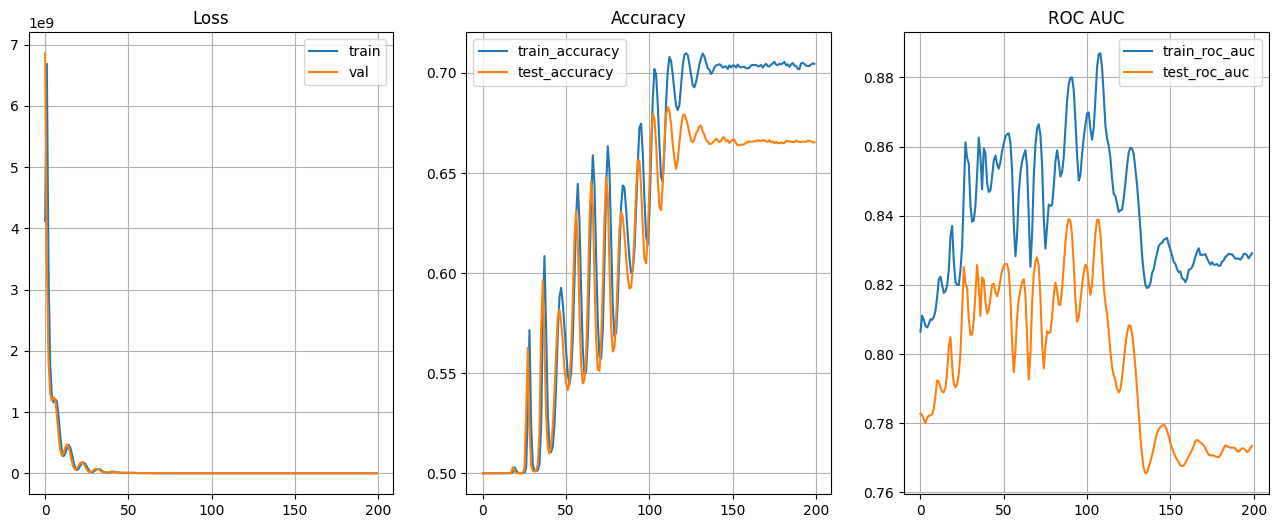

In [38]:
model = GCN_v2()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()

loss_train_lst, accuracy_train_lst = [], []
loss_test_lst, accuracy_test_lst = [], []
roc_train_lst, roc_test_lst = [], []
for epoch in range(1, 201):
    accuracy_train, loss_train, roc_train = train()
    loss_train_lst.append(loss_train)
    accuracy_train_lst.append(accuracy_train)
    roc_train_lst.append(roc_train)

    val_acc, val_loss, val_roc = test(data.val_pos_edge_index, data.val_neg_edge_index)
    loss_test_lst.append(val_loss)
    accuracy_test_lst.append(val_acc)
    roc_test_lst.append(val_roc)

    if epoch % 20 == 0:
        clear_output()
        print(f'Epoch: {epoch:03d}, Loss Train: {loss_train:.4f}, Acc Train: {accuracy_train:.6f}, ROC AUC Train: {roc_train:.6f}')
        print(f'Epoch: {epoch:03d}, Loss Val: {val_loss:.4f}, Acc Val: {val_acc:.6f}, ROC AUC Test: {val_roc:.6f}')

        plt.figure(figsize=(16, 6))
        plt.subplot(131)
        plt.plot(loss_train_lst, label='train')
        plt.plot(loss_test_lst, label='val')
        plt.legend()
        plt.grid()
        plt.title("Loss")

        plt.subplot(132)
        plt.plot(accuracy_train_lst, label='train_accuracy')
        plt.plot(accuracy_test_lst, label='test_accuracy')
        plt.legend()
        plt.grid()
        plt.title('Accuracy')

        plt.subplot(133)
        plt.plot(roc_train_lst, label='train_roc_auc')
        plt.plot(roc_test_lst, label='test_roc_auc')
        plt.legend()
        plt.grid()
        plt.title('ROC AUC')
        plt.show()

In [41]:
print(max(accuracy_test_lst))
print(max(roc_test_lst))

0.6828683018684387
0.8390731377180063


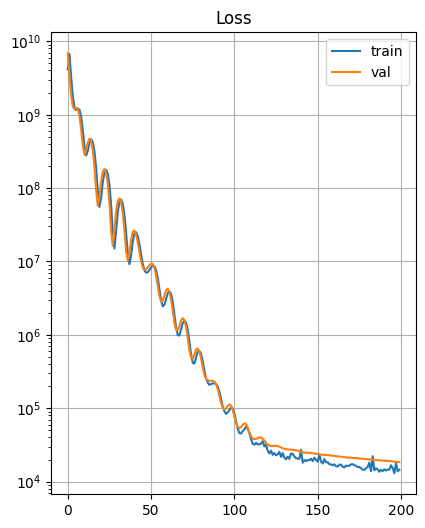

In [48]:
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.plot(loss_train_lst, label='train')
plt.plot(loss_test_lst, label='val')
plt.yscale('log')
plt.legend()
plt.grid()
plt.title("Loss")
plt.show()

#GSN + dropout model

In [54]:
class GCN_v3(torch.nn.Module):
    def __init__(self):
        super(GCN_v3, self).__init__()
        self.conv1 = GCNConv(data.num_node_features, 512)
        self.conv2 = GCNConv(512, 1024)
        self.prelu = PReLU(1024)
        self.dropout = torch.nn.Dropout(p=0.2)
        self.conv3 = GCNConv(1024, 64)


    def encode(self):
        x = self.conv1(data.x, data.train_pos_edge_index)
        x = self.conv2(x, data.train_pos_edge_index)
        x = self.prelu(x)
        x = self.dropout(x)
        x = self.conv3(x, data.train_pos_edge_index)
        return x

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        return logits

model = GCN_v3()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()

Epoch: 200, Loss Train: 1858591.5000, Acc Train: 0.688368, ROC AUC Train: 0.790346
Epoch: 200, Loss Val: 297628.3125, Acc Val: 0.658255, ROC AUC Test: 0.797143


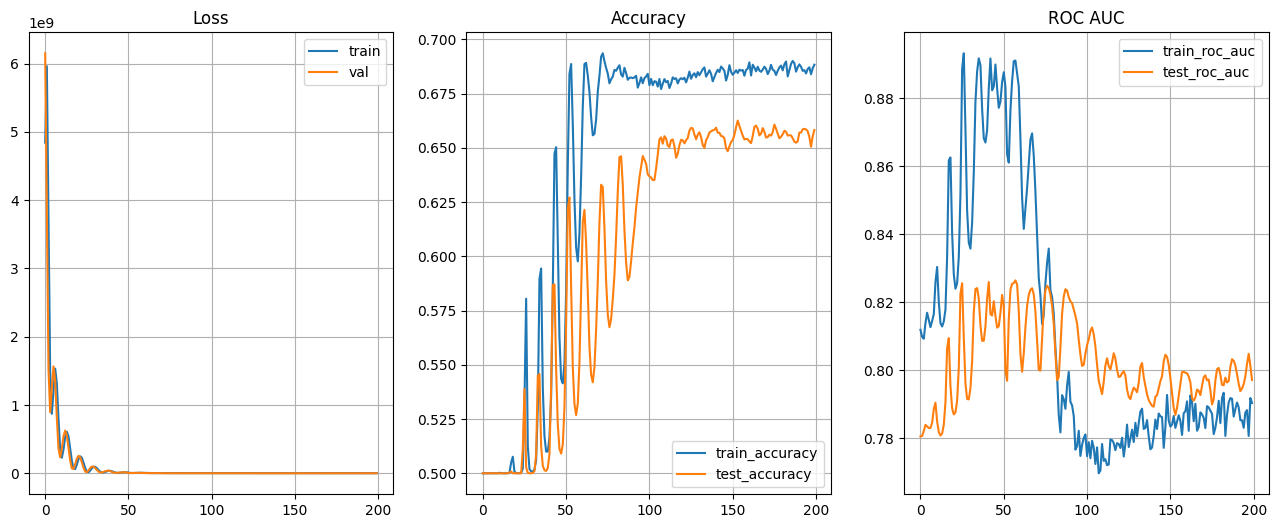

In [55]:
loss_train_lst, accuracy_train_lst = [], []
loss_test_lst, accuracy_test_lst = [], []
roc_train_lst, roc_test_lst = [], []
for epoch in range(1, 201):
    accuracy_train, loss_train, roc_train = train()
    loss_train_lst.append(loss_train)
    accuracy_train_lst.append(accuracy_train)
    roc_train_lst.append(roc_train)

    val_acc, val_loss, val_roc = test(data.val_pos_edge_index, data.val_neg_edge_index)
    loss_test_lst.append(val_loss)
    accuracy_test_lst.append(val_acc)
    roc_test_lst.append(val_roc)

    if epoch % 20 == 0:
        clear_output()
        print(f'Epoch: {epoch:03d}, Loss Train: {loss_train:.4f}, Acc Train: {accuracy_train:.6f}, ROC AUC Train: {roc_train:.6f}')
        print(f'Epoch: {epoch:03d}, Loss Val: {val_loss:.4f}, Acc Val: {val_acc:.6f}, ROC AUC Test: {val_roc:.6f}')

        plt.figure(figsize=(16, 6))
        plt.subplot(131)
        plt.plot(loss_train_lst, label='train')
        plt.plot(loss_test_lst, label='val')
        plt.legend()
        plt.grid()
        plt.title("Loss")

        plt.subplot(132)
        plt.plot(accuracy_train_lst, label='train_accuracy')
        plt.plot(accuracy_test_lst, label='test_accuracy')
        plt.legend()
        plt.grid()
        plt.title('Accuracy')

        plt.subplot(133)
        plt.plot(roc_train_lst, label='train_roc_auc')
        plt.plot(roc_test_lst, label='test_roc_auc')
        plt.legend()
        plt.grid()
        plt.title('ROC AUC')
        plt.show()

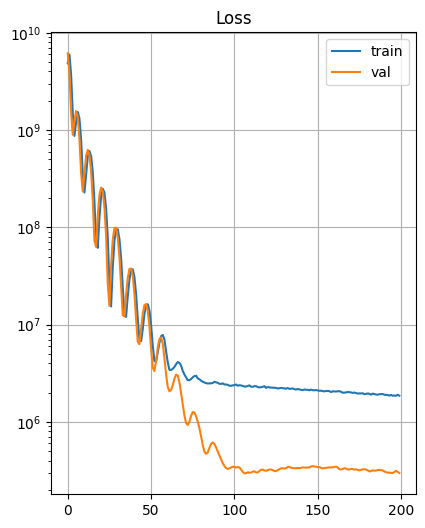

In [56]:
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.plot(loss_train_lst, label='train')
plt.plot(loss_test_lst, label='val')
plt.yscale('log')
plt.legend()
plt.grid()
plt.title("Loss")
plt.show()

#Chebyshev

In [57]:
from torch_geometric.nn import ChebConv, DenseSAGEConv, TransformerConv
import torch.nn as nn

In [71]:
class Cheb(torch.nn.Module):
    def __init__(self):
        super(Cheb, self).__init__()
        self.conv0 = GCNConv(data.num_node_features, 512)
        self.conv1 = GCNConv(512, 1024)
        self.conv2 = ChebConv(1024, 512, K=2)
        self.prelu2 = PReLU(1024)
        self.prelu1 = PReLU(512)
        self.lin = nn.Linear(512, 64)

    def encode(self):
        x = self.conv0(data.x, data.train_pos_edge_index)
        x = self.prelu1(x)
        x = self.conv1(x, data.train_pos_edge_index)
        x = self.prelu2(x)
        x = self.conv2(x, data.train_pos_edge_index)
        x = self.lin(x)
        return x #self.conv2(x, data.train_pos_edge_index)

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        #print('EDGE INDEX', edge_index, type(edge_index))
        #print('Z 0: ', z[edge_index[0]], 'Z 1', z[edge_index[1]])
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        #print('logits', logits, max(logits), min(logits))

        return logits #torch.nn.functional.softmax(logits, dim=-1)

model = Cheb()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()

Epoch: 200, Loss Train: 14171.8027, Acc Train: 0.693152, ROC AUC Train: 0.810221
Epoch: 200, Loss Val: 16372.0879, Acc Val: 0.674960, ROC AUC Test: 0.776051


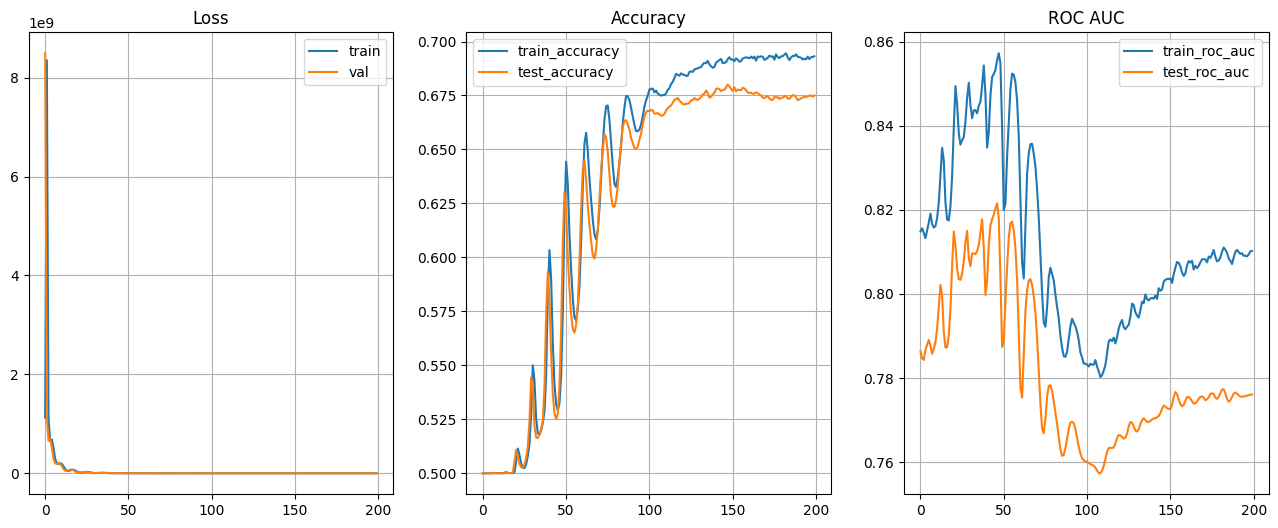

In [72]:
loss_train_lst, accuracy_train_lst = [], []
loss_test_lst, accuracy_test_lst = [], []
roc_train_lst, roc_test_lst = [], []
for epoch in range(1, 201):
    accuracy_train, loss_train, roc_train = train()
    loss_train_lst.append(loss_train)
    accuracy_train_lst.append(accuracy_train)
    roc_train_lst.append(roc_train)

    val_acc, val_loss, val_roc = test(data.val_pos_edge_index, data.val_neg_edge_index)
    loss_test_lst.append(val_loss)
    accuracy_test_lst.append(val_acc)
    roc_test_lst.append(val_roc)

    if epoch % 10 == 0:
        clear_output()
        print(f'Epoch: {epoch:03d}, Loss Train: {loss_train:.4f}, Acc Train: {accuracy_train:.6f}, ROC AUC Train: {roc_train:.6f}')
        print(f'Epoch: {epoch:03d}, Loss Val: {val_loss:.4f}, Acc Val: {val_acc:.6f}, ROC AUC Test: {val_roc:.6f}')

        plt.figure(figsize=(16, 6))
        plt.subplot(131)
        plt.plot(loss_train_lst, label='train')
        plt.plot(loss_test_lst, label='val')
        plt.legend()
        plt.grid()
        plt.title("Loss")

        plt.subplot(132)
        plt.plot(accuracy_train_lst, label='train_accuracy')
        plt.plot(accuracy_test_lst, label='test_accuracy')
        plt.legend()
        plt.grid()
        plt.title('Accuracy')

        plt.subplot(133)
        plt.plot(roc_train_lst, label='train_roc_auc')
        plt.plot(roc_test_lst, label='test_roc_auc')
        plt.legend()
        plt.grid()
        plt.title('ROC AUC')
        plt.show()

#Cheb

In [ ]:
from torch_geometric.nn import ChebConv
import torch.nn as nn

class Cheb(torch.nn.Module):
    def __init__(self):
        super(Cheb, self).__init__()
        self.conv0 = ChebConv(data.num_node_features, 512, K=2)
        self.conv1 = ChebConv(512, 1024, K=2)
        self.conv2 = ChebConv(1024, 512, K=2)
        self.prelu = PReLU(1024)
        self.lin = nn.Linear(512, 64)

    def encode(self):
        x = self.conv0(data.x, data.train_pos_edge_index)
        x = self.conv1(x, data.train_pos_edge_index)
        x = self.prelu(x)
        x = self.conv2(x, data.train_pos_edge_index)
        x = self.lin(x)
        return x #self.conv2(x, data.train_pos_edge_index)

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        #print('EDGE INDEX', edge_index, type(edge_index))
        #print('Z 0: ', z[edge_index[0]], 'Z 1', z[edge_index[1]])
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        #print('logits', logits, max(logits), min(logits))

        return logits #torch.nn.functional.softmax(logits, dim=-1)

model = Cheb()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode()
    pos_edge_index = data.train_pos_edge_index
    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index,
        num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.size(1))
    #print('POS EDGE INDEX', pos_edge_index, type(pos_edge_index))
    #print('NEG EDGE INDEX', neg_edge_index, type(neg_edge_index))
    #print('OUTPUT', model.decode(z, pos_edge_index, neg_edge_index).unique(return_counts=True))
    #print('Target', torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))]))
    loss = criterion(model.decode(z, pos_edge_index, neg_edge_index), torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0))
    #print('loss', loss)
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode()
        logits = model.decode(z, pos_edge_index, neg_edge_index)
        preds = (logits > 0.5).float()
        labels = torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0)
        accuracy = (preds == labels).float().mean()
    return accuracy.item()

for epoch in range(1, 201):
    loss = train()
    if epoch % 10 == 0:
        val_acc = test(data.val_pos_edge_index, data.val_neg_edge_index)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val Acc: {val_acc:.4f}')

test_acc = test(data.test_pos_edge_index, data.test_neg_edge_index)
print(f'Test Accuracy: {test_acc:.4f}')

#Transformer

In [ ]:
from torch_geometric.nn import ChebConv, DenseSAGEConv, TransformerConv
import torch.nn as nn


class Transformer(torch.nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.conv0 = TransformerConv(data.num_node_features, 512)
        self.conv1 = TransformerConv(512, 1024)
        self.conv2 = ChebConv(1024, 512, K=3)
        self.prelu = PReLU(1024)
        self.lin = nn.Linear(512, 64)

    def encode(self):
        x = self.conv0(data.x, data.train_pos_edge_index)
        x = self.conv1(x, data.train_pos_edge_index)
        x = self.prelu(x)
        x = self.conv2(x, data.train_pos_edge_index)
        x = self.lin(x)
        return x #self.conv2(x, data.train_pos_edge_index)

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        #print('EDGE INDEX', edge_index, type(edge_index))
        #print('Z 0: ', z[edge_index[0]], 'Z 1', z[edge_index[1]])
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        #print('logits', logits, max(logits), min(logits))

        return logits #torch.nn.functional.softmax(logits, dim=-1)

model = Transformer()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()

def train():
    # loss_log, acc_log = [], []
    model.train()
    optimizer.zero_grad()
    z = model.encode()
    pos_edge_index = data.train_pos_edge_index
    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index,
        num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.size(1))

    logits = model.decode(z, pos_edge_index, neg_edge_index)
    labels = torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0)
    preds = (torch.nn.functional.sigmoid(logits) > 0.5).float()
    accuracy = (preds == labels).float().mean()
    preds_score = logits.detach().numpy()
    labels_np = labels.numpy()
    roc_train = roc_auc_score(labels_np, preds_score)
    # acc_log.append(accuracy.item)

    loss = criterion(logits, torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0))
    loss.backward()
    optimizer.step()
    # loss_log.append(loss.item())
    return accuracy.item(), loss.item(), roc_train

def test(pos_edge_index, neg_edge_index):
    # loss_log_test, acc_log_test = [], []
    model.eval()
    with torch.no_grad():
        z = model.encode()
        logits = model.decode(z, pos_edge_index, neg_edge_index)
        preds = (torch.nn.functional.sigmoid(logits) > 0.5).float()
        labels = torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0)
        accuracy = (preds == labels).float().mean()
        loss = criterion(logits, torch.cat([torch.ones(pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0))
        # loss_log_test.append(loss.item())
        # acc_log_test.append(accuracy.item())
        preds_score = logits.numpy()
        labels_np = labels.numpy()
        roc_test = roc_auc_score(labels_np, preds_score)
        # print(preds_score, labels_np, roc_test)
    return accuracy.item(), loss.item(), roc_test

loss_train_lst, accuracy_train_lst = [], []
loss_test_lst, accuracy_test_lst = [], []
roc_train_lst, roc_test_lst = [], []
for epoch in range(1, 201):
    accuracy_train, loss_train, roc_train = train()
    loss_train_lst.append(loss_train)
    accuracy_train_lst.append(accuracy_train)
    roc_train_lst.append(roc_train)

    val_acc, val_loss, val_roc = test(data.val_pos_edge_index, data.val_neg_edge_index)
    loss_test_lst.append(val_loss)
    accuracy_test_lst.append(val_acc)
    roc_test_lst.append(val_roc)

    if epoch % 20 == 0:
        clear_output()
        print(f'Epoch: {epoch:03d}, Loss Train: {loss_train:.4f}, Acc Train: {accuracy_train:.6f}, ROC AUC Train: {roc_train:.6f}')
        print(f'Epoch: {epoch:03d}, Loss Val: {val_loss:.4f}, Acc Val: {val_acc:.6f}, ROC AUC Test: {val_roc:.6f}')

        plt.figure(figsize=(16, 6))
        plt.subplot(131)
        plt.plot(loss_train_lst, label='train')
        plt.plot(loss_test_lst, label='val')
        plt.legend()
        plt.grid()
        plt.title("Loss")

        plt.subplot(132)
        plt.plot(accuracy_train_lst, label='train_accuracy')
        plt.plot(accuracy_test_lst, label='test_accuracy')
        plt.legend()
        plt.grid()
        plt.title('Accuracy')

        plt.subplot(133)
        plt.plot(roc_train_lst, label='train_roc_auc')
        plt.plot(roc_test_lst, label='test_roc_auc')
        plt.legend()
        plt.grid()
        plt.title('ROC AUC')
        plt.show()